#### linear regression with numpy array
- Calculate the gradient instead of defining the range of `w`
- Revision of https://github.com/patrickloeber/pytorchTutorial/blob/master/05_1_gradientdescent_manually.py
- https://www.tpointtech.com/gradient-descent-in-machine-learning

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def forward(w, x):
    return w * x

# MSE as the loss function
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# MSE = j = 1/N * (w*x - y)**2
# dJ/dw = 2/N (w*x - y)*x
def gradient(x, y, y_pred):
    return np.mean(2*x*(y_pred - y))

In [16]:
# Training
def train(learning_rate, n_iters, w, X, Y):
    traced_ws=[w]
    for epoch in range(n_iters):
        # predict = forward pass
        y_pred = forward(w, X)

        # loss
        l = loss(Y, y_pred)
        
        # calculate gradients
        dw = gradient(X, Y, y_pred)

        # update weights
        w -= learning_rate * dw
        
        # We save all weights and want to trace each weight change later
        traced_ws.append(w)
        
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
    return traced_ws

In [17]:
# Define the data
X = np.array([1.0, 2.0, 3, 4], dtype=np.float32)
Y = np.array([2.3, 3.4, 6.5, 6.8], dtype=np.float32)

# Configration
learning_rate = 0.01
n_iters = 30
w_init = 30.0
traced_ws=train(learning_rate, n_iters, w_init, X, Y)

print(f'Prediction after training: f(6) = {forward(traced_ws[-1], 6):.3f}')

epoch 1: w = 25.779, loss = 5939.33496094
epoch 2: w = 22.191, loss = 4291.27685547
epoch 3: w = 19.141, loss = 3100.55566406
epoch 4: w = 16.549, loss = 2240.25878906
epoch 5: w = 14.346, loss = 1618.69470215
epoch 6: w = 12.473, loss = 1169.61450195
epoch 7: w = 10.881, loss = 845.15423584
epoch 8: w = 9.528, loss = 610.73156738
epoch 9: w = 8.378, loss = 441.36120605
epoch 10: w = 7.400, loss = 318.99108887
epoch 11: w = 6.569, loss = 230.57872009
epoch 12: w = 5.863, loss = 166.70083618
epoch 13: w = 5.262, loss = 120.54901886
epoch 14: w = 4.752, loss = 87.20434570
epoch 15: w = 4.318, loss = 63.11280441
epoch 16: w = 3.949, loss = 45.70667267
epoch 17: w = 3.636, loss = 33.13073730
epoch 18: w = 3.370, loss = 24.04463005
epoch 19: w = 3.143, loss = 17.47991371
epoch 20: w = 2.951, loss = 12.73690891
epoch 21: w = 2.787, loss = 9.31008530
epoch 22: w = 2.648, loss = 6.83420563
epoch 23: w = 2.530, loss = 5.04538441
epoch 24: w = 2.429, loss = 3.75295949
epoch 25: w = 2.344, loss =

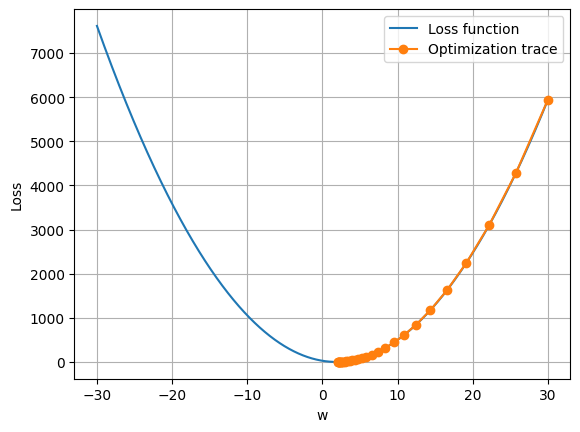

In [18]:
# Wrapper for loss to compute J(w)
def J_loss(w, x, y):
    y_pred = forward(w, x)  # Linear model: y_pred = w * x
    return loss(y, y_pred)

def show_trace(ws, J_loss, x, y):
    # Determine plot range (ensure  w_range >= 1 to avoid empty range)
    w_range = max(abs(min(ws)), abs(max(ws)), 1)
    w_plot_range = np.arange(-w_range, w_range, 0.001)
    
    # Compute loss for smooth curve and optimization trace
    losses = [J_loss(w, x, y) for w in w_plot_range]
    traced_losses = [J_loss(w, x, y) for w in ws]
    
    # Plot
    plt.plot(w_plot_range, losses, '-', label='Loss function')
    plt.plot(traced_ws, traced_losses, '-o', label='Optimization trace')
    plt.xlabel('w')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
show_trace(traced_ws, J_loss, X, Y)

#### impacts of learning rates
- Change learning rates from 0.01 to 0.1 (too big)
- Change learning rates from 0.01 to 0.001 (too small)

epoch 1: w = -12.210, loss = 5939.33496094
epoch 2: w = 8.895, loss = 1485.12451172
epoch 3: w = -1.658, loss = 371.57226562
epoch 4: w = 3.619, loss = 93.18405914
epoch 5: w = 0.981, loss = 23.58701324
epoch 6: w = 2.300, loss = 6.18775463
epoch 7: w = 1.640, loss = 1.83793712
epoch 8: w = 1.970, loss = 0.75048447
epoch 9: w = 1.805, loss = 0.47862118
epoch 10: w = 1.887, loss = 0.41065520
epoch 11: w = 1.846, loss = 0.39366382
epoch 12: w = 1.867, loss = 0.38941598
epoch 13: w = 1.857, loss = 0.38835379
epoch 14: w = 1.862, loss = 0.38808846
epoch 15: w = 1.859, loss = 0.38802209
epoch 16: w = 1.860, loss = 0.38800552
epoch 17: w = 1.860, loss = 0.38800126
epoch 18: w = 1.860, loss = 0.38800013
epoch 19: w = 1.860, loss = 0.38800007
epoch 20: w = 1.860, loss = 0.38799989
epoch 21: w = 1.860, loss = 0.38799989
epoch 22: w = 1.860, loss = 0.38799998
epoch 23: w = 1.860, loss = 0.38799998
epoch 24: w = 1.860, loss = 0.38799998
epoch 25: w = 1.860, loss = 0.38799986
epoch 26: w = 1.860, 

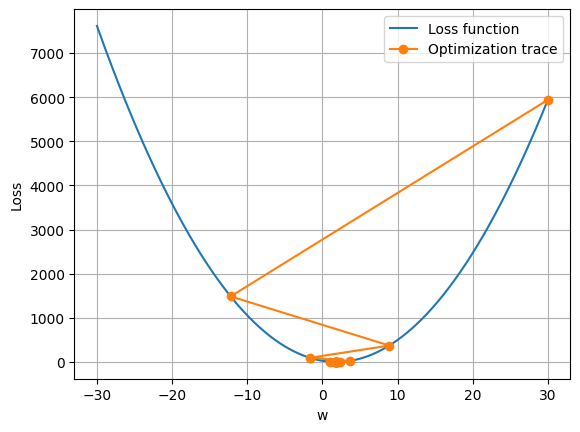

In [19]:
# Define the data
X = np.array([1.0, 2.0, 3, 4], dtype=np.float32)
Y = np.array([2.3, 3.4, 6.5, 6.8], dtype=np.float32)

# Configration
learning_rate = 0.1
n_iters = 30
w_init = 30.0
traced_ws=train(learning_rate, n_iters, w_init, X, Y)

print(f'Prediction after training: f(6) = {forward(traced_ws[-1], 6):.3f}')

show_trace(traced_ws, J_loss, X, Y)

epoch 1: w = 29.578, loss = 5939.33496094
epoch 2: w = 29.162, loss = 5762.50292969
epoch 3: w = 28.753, loss = 5590.93554688
epoch 4: w = 28.349, loss = 5424.47753906
epoch 5: w = 27.952, loss = 5262.97509766
epoch 6: w = 27.560, loss = 5106.28125000
epoch 7: w = 27.175, loss = 4954.25292969
epoch 8: w = 26.795, loss = 4806.75146484
epoch 9: w = 26.421, loss = 4663.64257812
epoch 10: w = 26.053, loss = 4524.79394531
epoch 11: w = 25.690, loss = 4390.08007812
epoch 12: w = 25.332, loss = 4259.37695312
epoch 13: w = 24.980, loss = 4132.56542969
epoch 14: w = 24.634, loss = 4009.53002930
epoch 15: w = 24.292, loss = 3890.15771484
epoch 16: w = 23.955, loss = 3774.33984375
epoch 17: w = 23.624, loss = 3661.97070312
epoch 18: w = 23.298, loss = 3552.94677734
epoch 19: w = 22.976, loss = 3447.16894531
epoch 20: w = 22.659, loss = 3344.54101562
epoch 21: w = 22.347, loss = 3244.96923828
epoch 22: w = 22.040, loss = 3148.36230469
epoch 23: w = 21.737, loss = 3054.63110352
epoch 24: w = 21.439

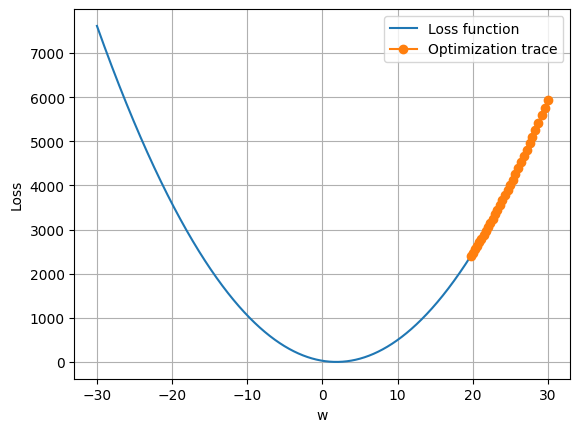

In [20]:
# Define the data
X = np.array([1.0, 2.0, 3, 4], dtype=np.float32)
Y = np.array([2.3, 3.4, 6.5, 6.8], dtype=np.float32)

# Configration
learning_rate = 0.001
n_iters = 30
w_init = 30.0
traced_ws=train(learning_rate, n_iters, w_init, X, Y)

print(f'Prediction after training: f(6) = {forward(traced_ws[-1], 6):.3f}')

show_trace(traced_ws, J_loss, X, Y)